In [300]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

from dataset import VNAgriDataset

# Đọc dữ liệu rau, quả

In [301]:
with open("../../data/Rau, qua", "r", encoding="utf-16") as file:
    rauqua = file.read()

In [302]:
rauqua_df = pd.read_html(rauqua)[0]
rauqua_df.shape

C:\Users\DELL\AppData\Local\Temp\ipykernel_272\1453333364.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  rauqua_df = pd.read_html(rauqua)[0]


(29593, 8)

In [303]:
rauqua_df.head()

,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
0,Bắp cải,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,10000.0
1,Bắp cải thảo,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,10000.0
2,Bưởi da xanh,Sơn La,Bán lẻ,VNĐ/quả,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,35000.0
3,Bưởi Diễn,Sơn La,Bán lẻ,VNĐ/quả,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,10000.0
4,Cà chua,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,12000.0


# Kiểm tra dữ liệu thiếu

In [304]:
rauqua_df.isnull().sum()

Tên_mặt_hàng    0
Thị_trường      0
Loại_giá        0
Đơn_vị_tính     0
Loại_tiền       0
Nguồn           0
Ngày            0
Giá             0
dtype: int64

# Kiểm tra dữ liệu thừa

In [305]:
rauqua_df.duplicated().sum()

np.int64(0)

# Kiểm tra giá trị ngoại lai

In [306]:
gia_rauqua = rauqua_df["Giá"]

<Axes: ylabel='Giá'>

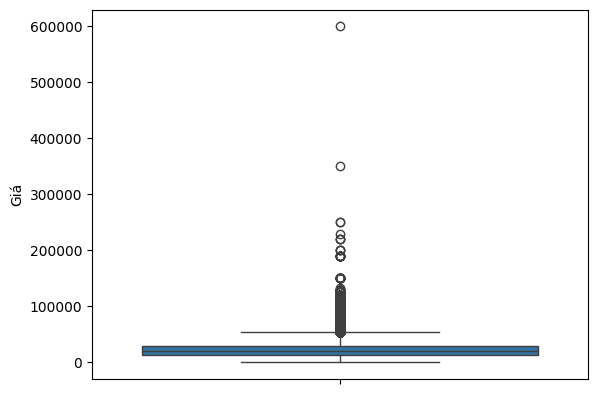

In [307]:
sns.boxplot(gia_rauqua)

## Kiểm tra từng mặt hàng riêng biệt

In [308]:
dataset = VNAgriDataset("../../data/Rau, qua")
outlier_filtered = dataset.get_outlier_mathang()

d:\University\Nam 3\HK3\Project 3\Code\src\preprocess\dataset.py:27: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  self.data = pd.read_html(html)[0]


In [309]:
outlier_filtered

('Chôm chôm',
 'Măng cụt',
 'Nhãn',
 'Dâu tây',
 'Na thái',
 'Cam canh',
 'Cam cara ruột đỏ',
 'Quýt Sài Gòn',
 'Na',
 'Lê xanh',
 'Đào mỏ quạ',
 'Xoài Đài Loan',
 'Vải',
 'Na Thái',
 'Sầu riêng cơm vàng hạt lép',
 'Xoài cát Hòa Lộc',
 'Sầu Riêng Ri 6',
 'Dừa xiêm lai',
 'Dừa xiêm xanh',
 'Mít ruột đỏ',
 'Cam sành (loại 2)',
 'Trái dứa/thơm',
 'Nhãn tiêu da bò',
 'Trái dứa/thơm (nhỏ)',
 'Đào',
 'Lựu',
 'Ổi',
 'Bông cải Xanh',
 'Quả bầu',
 'Mướp',
 'Trái dứa/thơm (to)',
 'Bưởi Diễn')

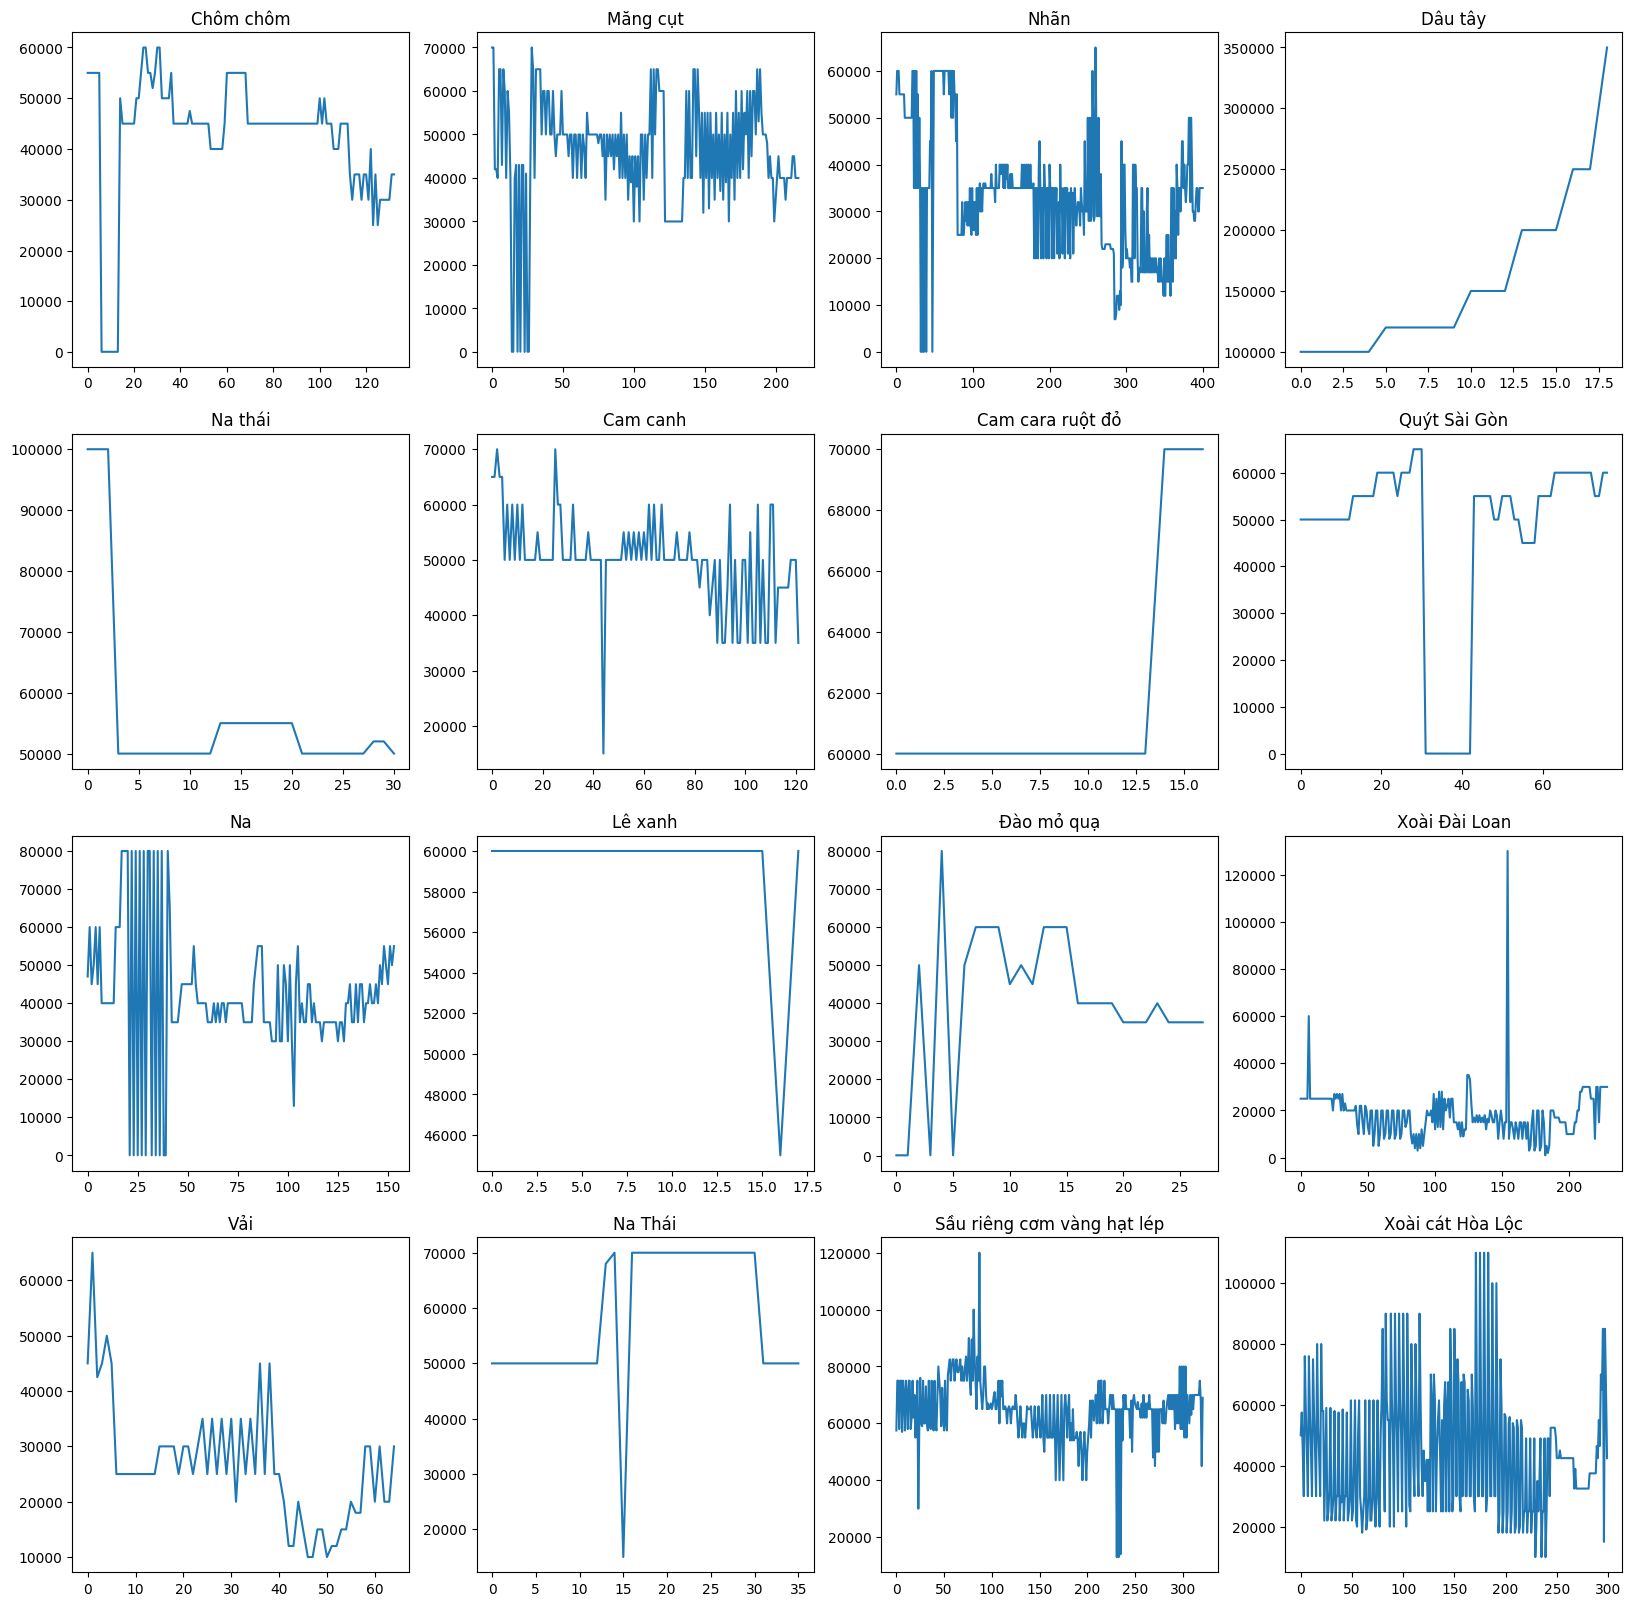

In [310]:
dataset.plot(outlier_filtered[:16], 4, 4)

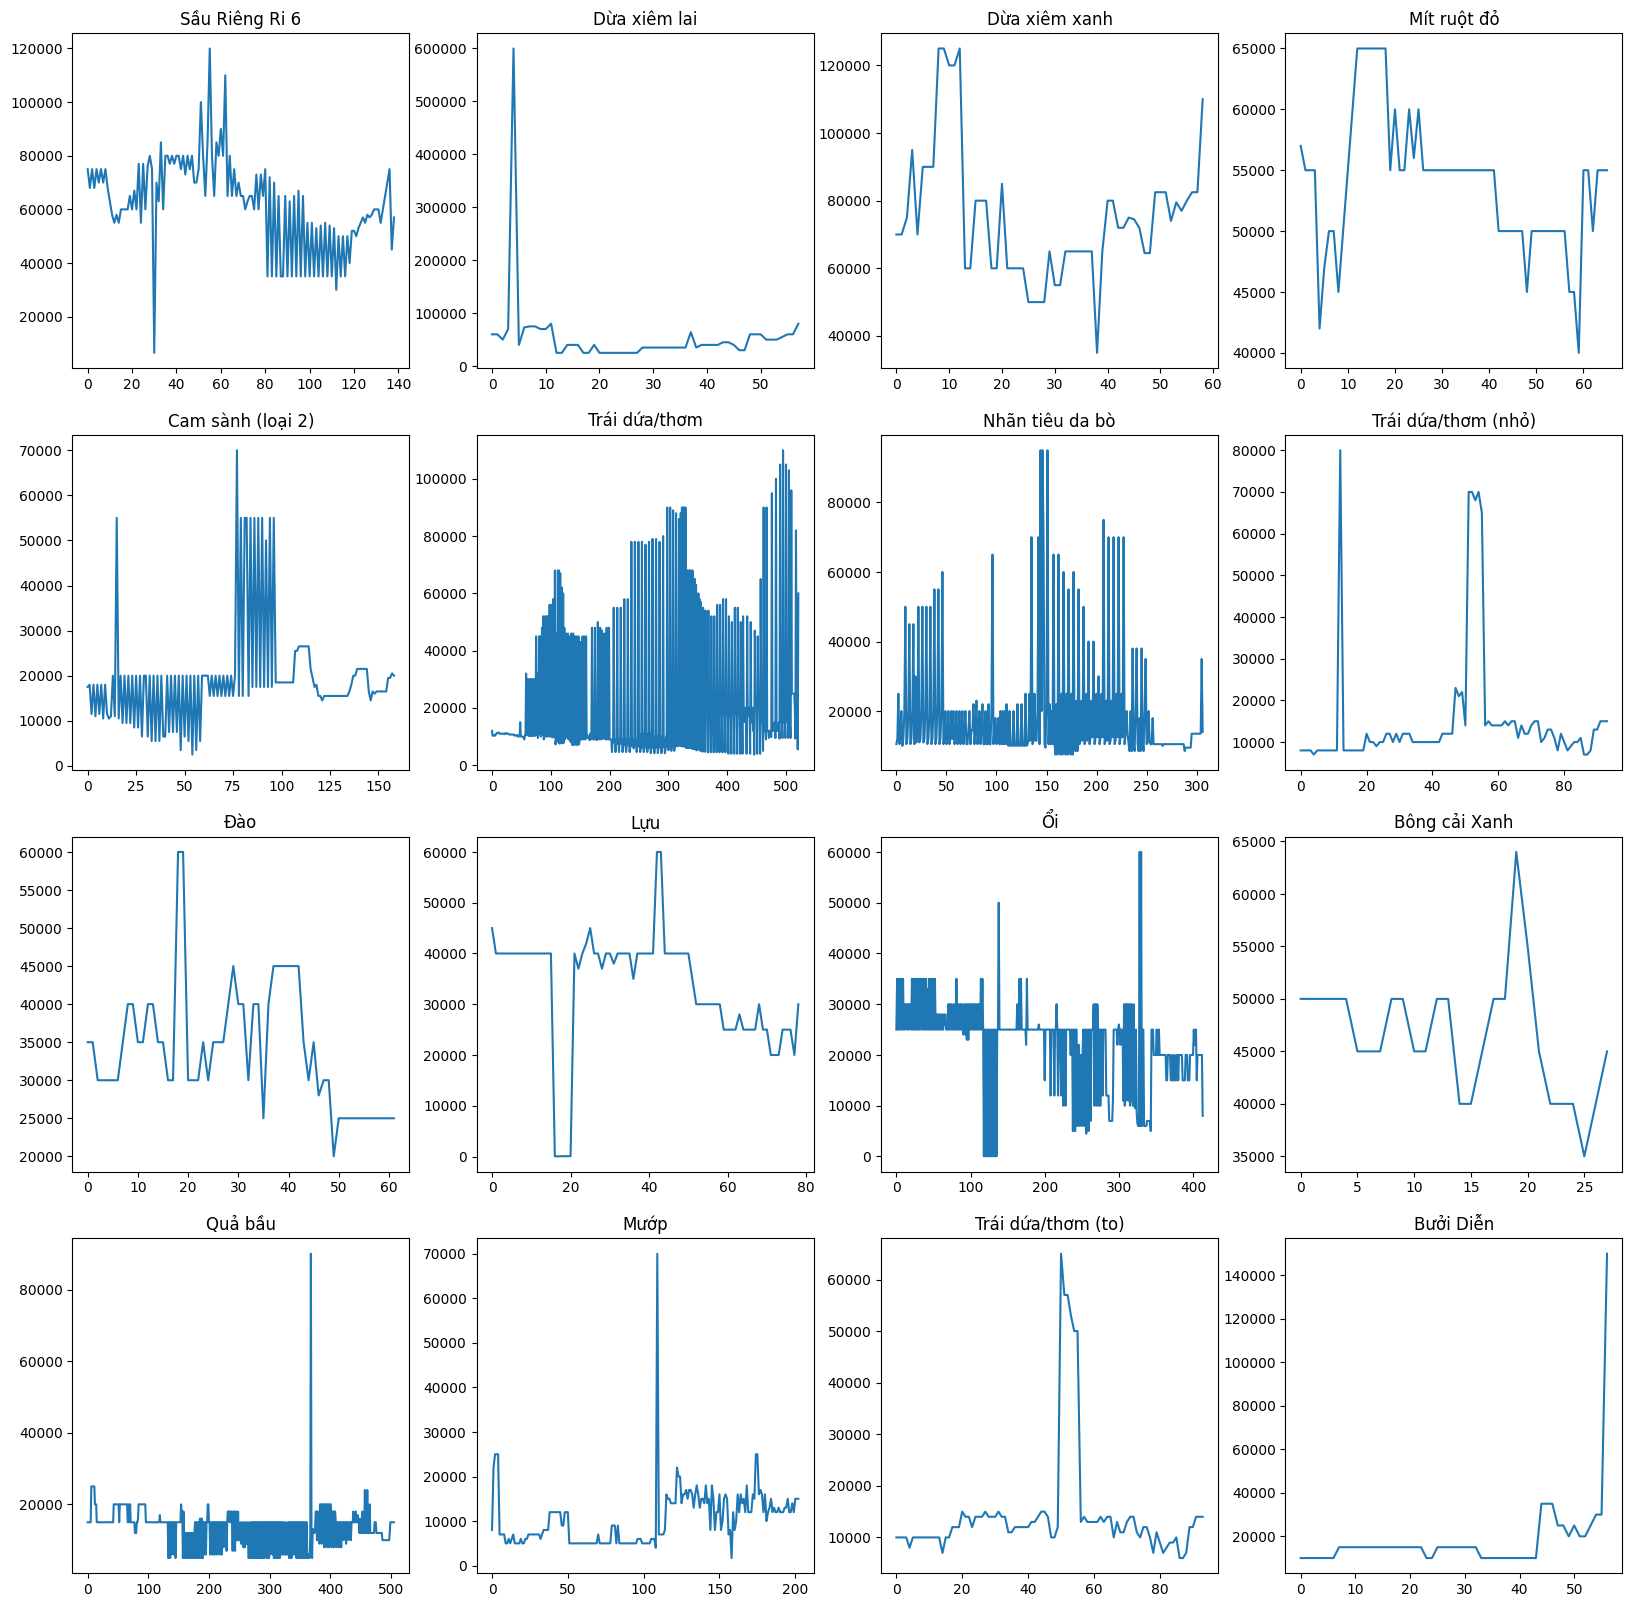

In [311]:
dataset.plot(outlier_filtered[16:32], 4, 4)

In [312]:
outlier_infos = dataset.get_outlier_infos()

In [313]:
names = [x[0] for x in outlier_infos]
min_vals = [x[4] for x in outlier_infos]
max_vals = [x[5] for x in outlier_infos]

### 0 - Chôm chôm

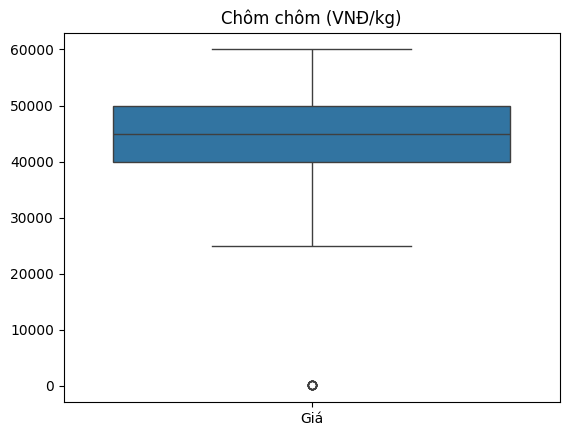

In [314]:
dataset.show_boxplot(names[0])

In [315]:
outlier_df0 = dataset.get_outlier_mathang_df(names[0], min_vals[0], max_vals[0])
print(dataset.calc_outlier_perc(names[0], min_vals[0], max_vals[0]))
outlier_df0

0.06015037593984962


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
4032,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-09-06,45.0
4114,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-30,55.0
4250,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-23,55.0
4386,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-16,55.0
4578,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-06,50.0
4631,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-02,50.0
4716,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-07-30,50.0
4773,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-07-26,50.0


In [316]:
rauqua_df = dataset.change_outlier_values_df(
    names[0], 
    min_vals[0], 
    max_vals[0], 
    lambda x: x*1000, 
    inplace=True
)

In [317]:
dataset.get_outlier_mathang_df(names[0], min_vals[0], max_vals[0])

,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá


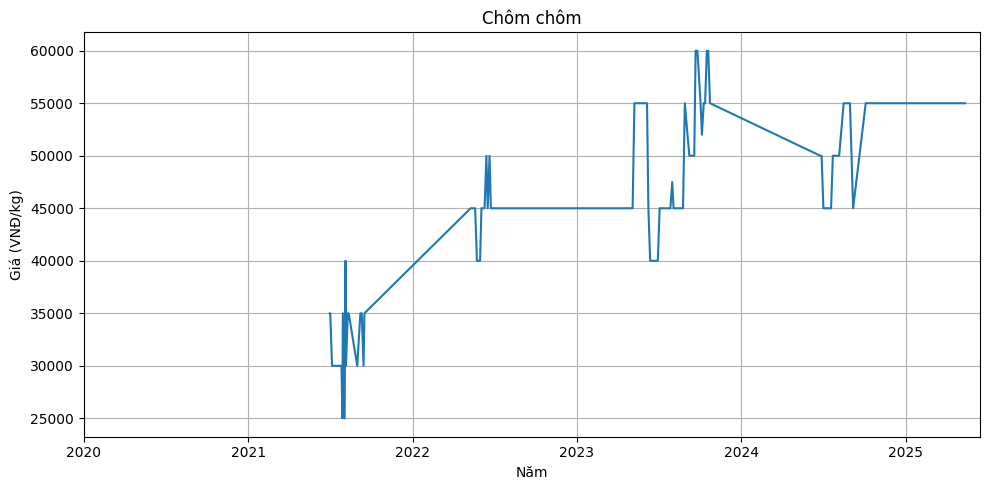

In [318]:
dataset.plot_one(names[0])

### 1 - Măng cụt

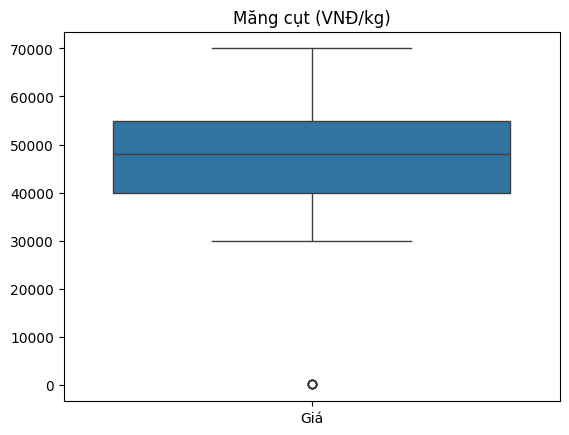

In [319]:
dataset.show_boxplot(names[1])

In [320]:
print(dataset.calc_outlier_perc(names[1], min_vals[1], max_vals[1]))
dataset.get_outlier_mathang_df(names[1], min_vals[1], max_vals[1])

0.03225806451612903


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
3984,Măng cụt,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-09-10,55.0
4038,Măng cụt,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-09-06,55.0
4202,Măng cụt,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-27,60.0
4338,Măng cụt,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-20,60.0
4638,Măng cụt,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-02,30.0
4723,Măng cụt,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-07-30,65.0
4781,Măng cụt,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-07-26,65.0


In [321]:
_ = dataset.change_outlier_values_df(
    names[1],
    min_vals[1],
    max_vals[1],
    lambda x: x * 1000,
    inplace=True
)

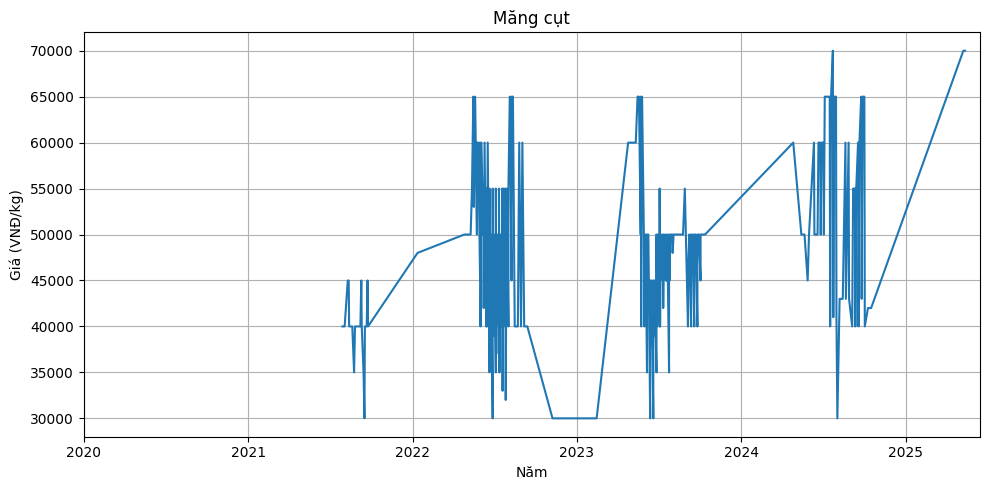

In [322]:
dataset.plot_one(names[1])

### 2 - Nhãn

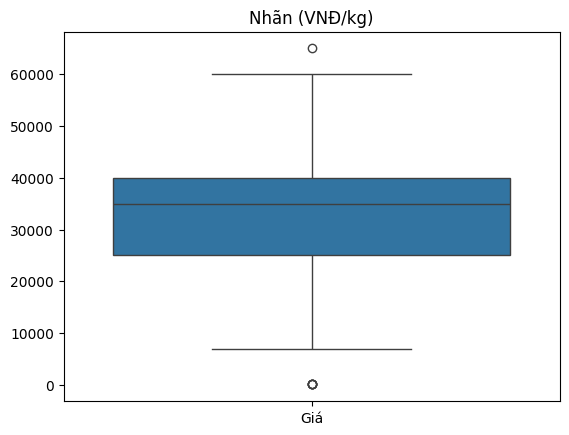

In [323]:
dataset.show_boxplot(names[2])

In [324]:
_ = dataset.change_outlier_values_df(
    names[2],
    min_vals[2],
    max_vals[2],
    lambda x: x * 1000,
    inplace=True
)

In [325]:
print(dataset.calc_outlier_perc(names[2], min_vals[2], max_vals[2]))
dataset.get_outlier_mathang_df(names[2], min_vals[2], max_vals[2])

0.0024937655860349127


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
20651,Nhãn,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2022-06-27,65000000.0


In [326]:
_ = dataset.change_outlier_values_df(
    names[2],
    min_vals[2],
    max_vals[2],
    lambda x: x / 1000,
    inplace=True
)

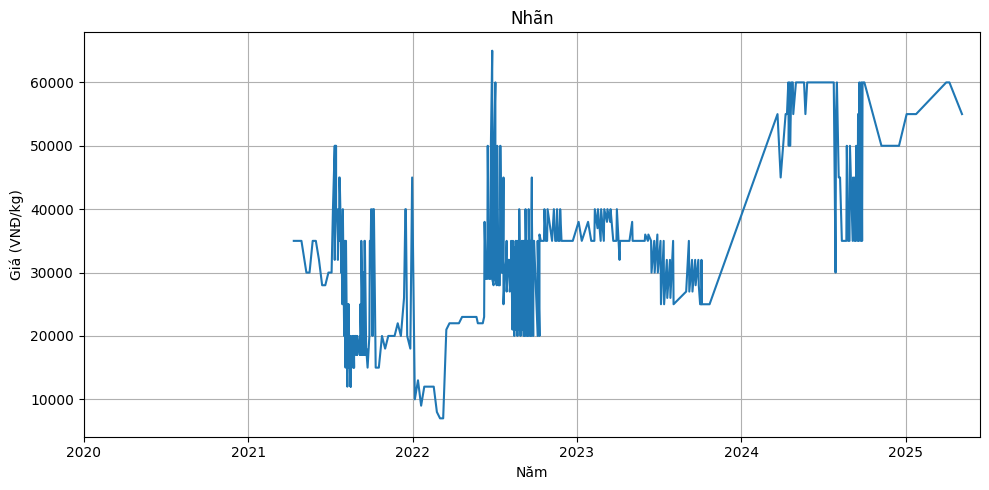

In [327]:
dataset.plot_one(names[2])

### 3 - Dâu tây

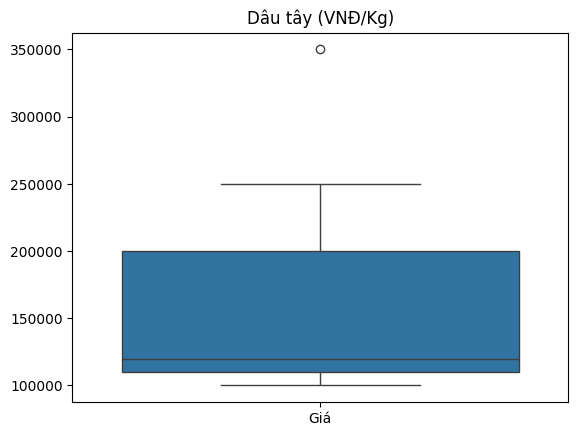

In [328]:
dataset.show_boxplot(names[3])

In [329]:
print(dataset.calc_outlier_perc(names[3], min_vals[3], max_vals[3]))
dataset.get_outlier_mathang_df(names[3], min_vals[3], max_vals[3])

0.05263157894736842


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
2317,Dâu tây,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2024-12-16,350000.0


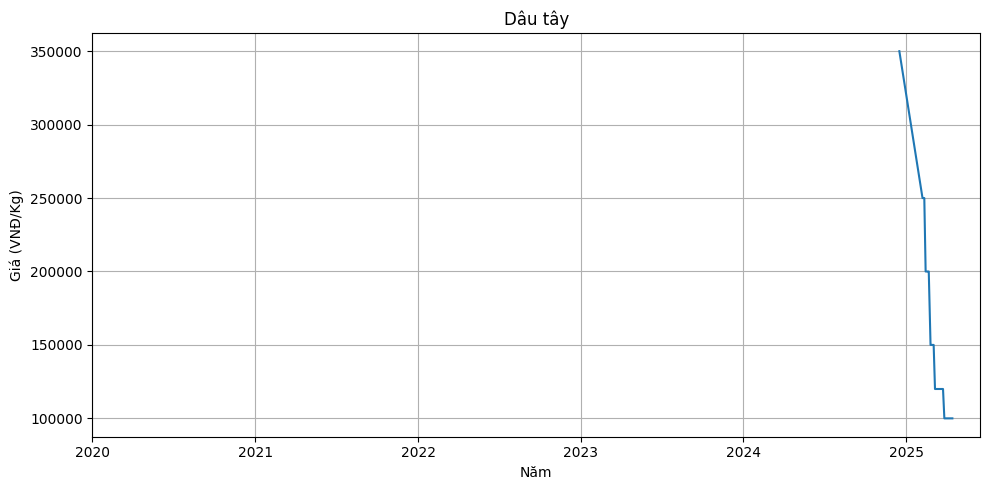

In [330]:
dataset.plot_one(names[3])

### 4 - Na Thái

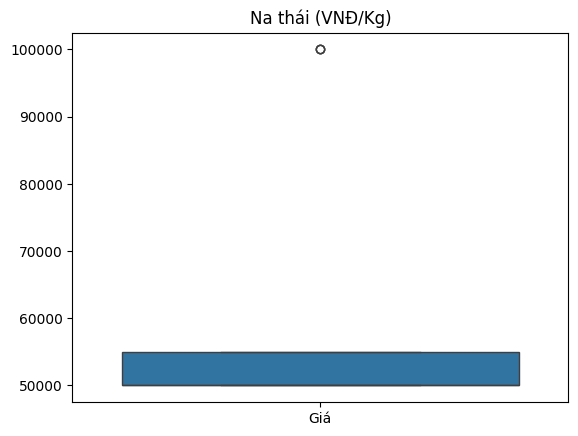

In [331]:
dataset.show_boxplot(names[4])

In [332]:
print(dataset.calc_outlier_perc(names[4], min_vals[4], max_vals[4]))
dataset.get_outlier_mathang_df(names[4], min_vals[4], max_vals[4])

0.0967741935483871


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
873,Na thái,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2025-03-24,100000.0
924,Na thái,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2025-03-20,100000.0
1006,Na thái,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2025-03-17,100000.0


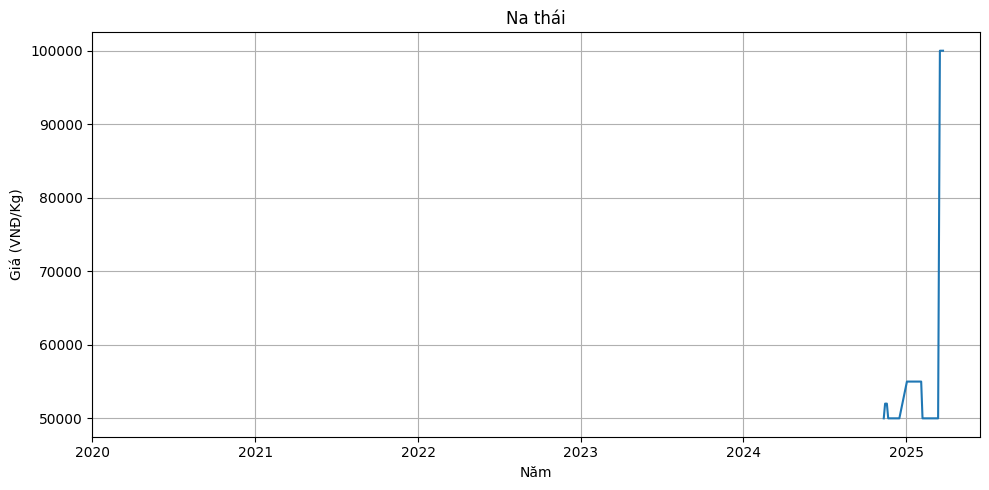

In [333]:
dataset.plot_one(names[4])

### 5 - Cam canh

In [334]:
names[5]

'Cam canh'

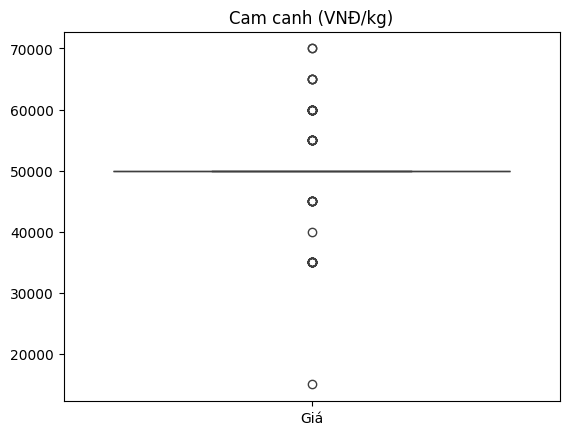

In [335]:
dataset.show_boxplot(names[5])

In [336]:
print(dataset.calc_outlier_perc(names[5], min_vals[5], max_vals[5]))
dataset.get_outlier_mathang_df(names[5], min_vals[5], max_vals[5])

0.4426229508196721


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
1204,Cam canh,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2025-03-04,65000.0
1258,Cam canh,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2025-02-28,65000.0
1422,Cam canh,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2025-02-21,70000.0
1506,Cam canh,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2025-02-18,65000.0
1750,Cam canh,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2025-02-04,65000.0
1806,Cam canh,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2025-01-24,60000.0
1892,Cam canh,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2025-01-21,60000.0
1948,Cam canh,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2025-01-17,60000.0
2033,Cam canh,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2025-01-14,60000.0
2229,Cam canh,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2025-01-03,55000.0


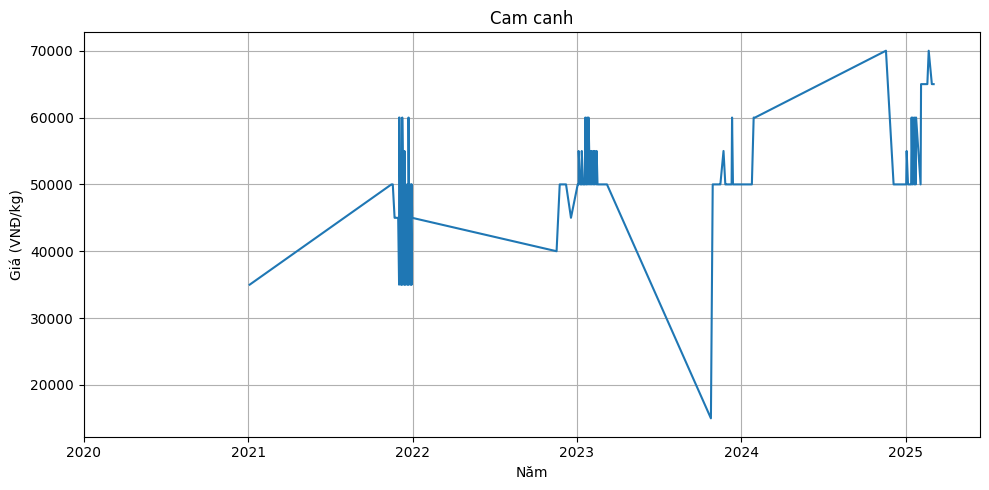

In [337]:
dataset.plot_one(names[5])

### 6 - Cam cara ruột đỏ

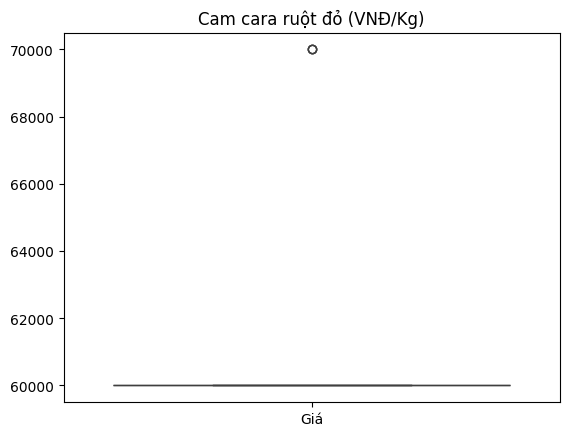

In [338]:
dataset.show_boxplot(names[6])

In [339]:
print(dataset.calc_outlier_perc(names[6], min_vals[6], max_vals[6]))
dataset.get_outlier_mathang_df(names[6], min_vals[6], max_vals[6])

0.17647058823529413


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
2697,Cam cara ruột đỏ,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2024-11-21,70000.0
2828,Cam cara ruột đỏ,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2024-11-14,70000.0
2908,Cam cara ruột đỏ,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2024-11-11,70000.0


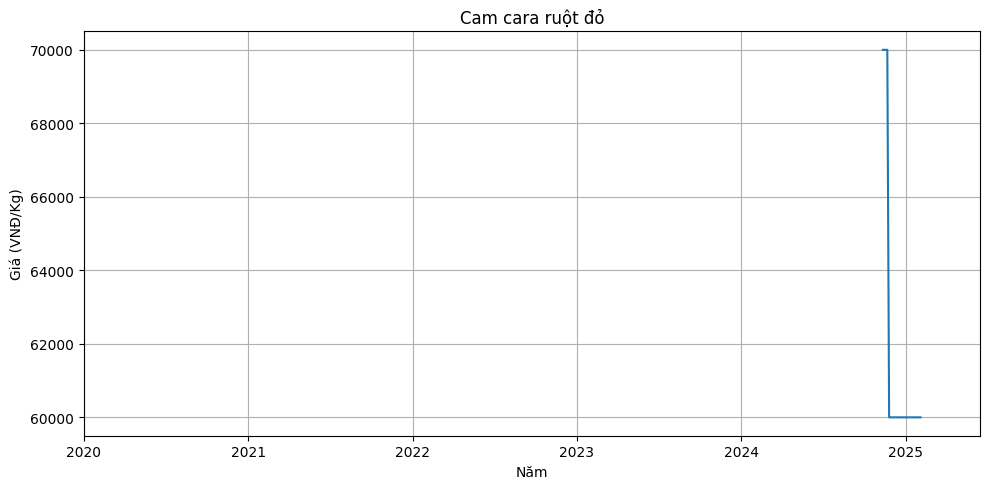

In [340]:
dataset.plot_one(names[6])

### 7 - Quýt Sài Gòn

In [341]:
names[7]

'Quýt Sài Gòn'

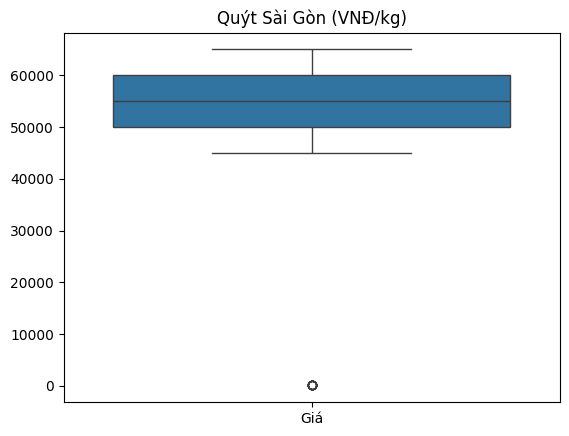

In [342]:
dataset.show_boxplot(names[7])

In [343]:
print(dataset.calc_outlier_perc(names[7], min_vals[7], max_vals[7]))
dataset.get_outlier_mathang_df(names[7], min_vals[7], max_vals[7])

0.15584415584415584


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
3989,Quýt Sài Gòn,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-09-10,65.0
4043,Quýt Sài Gòn,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-09-06,60.0
4126,Quýt Sài Gòn,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-30,60.0
4207,Quýt Sài Gòn,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-27,55.0
4262,Quýt Sài Gòn,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-23,60.0
4343,Quýt Sài Gòn,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-20,55.0
4397,Quýt Sài Gòn,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-16,60.0
4507,Quýt Sài Gòn,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-09,55.0
4589,Quýt Sài Gòn,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-06,55.0
4642,Quýt Sài Gòn,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-02,60.0


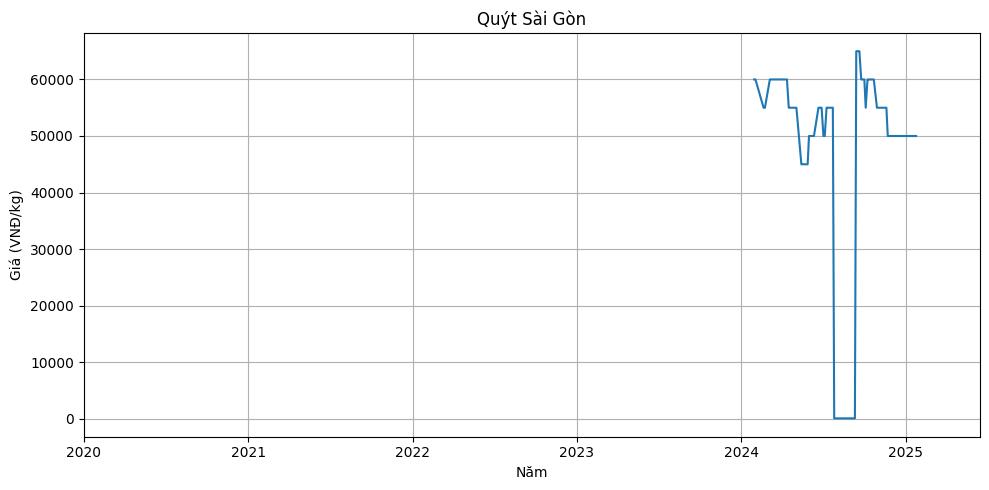

In [344]:
dataset.plot_one(names[7])

In [345]:
_ = dataset.change_outlier_values_df(
    names[7],
    min_vals[7],
    max_vals[7],
    lambda x: x * 1000,
    inplace=True
)

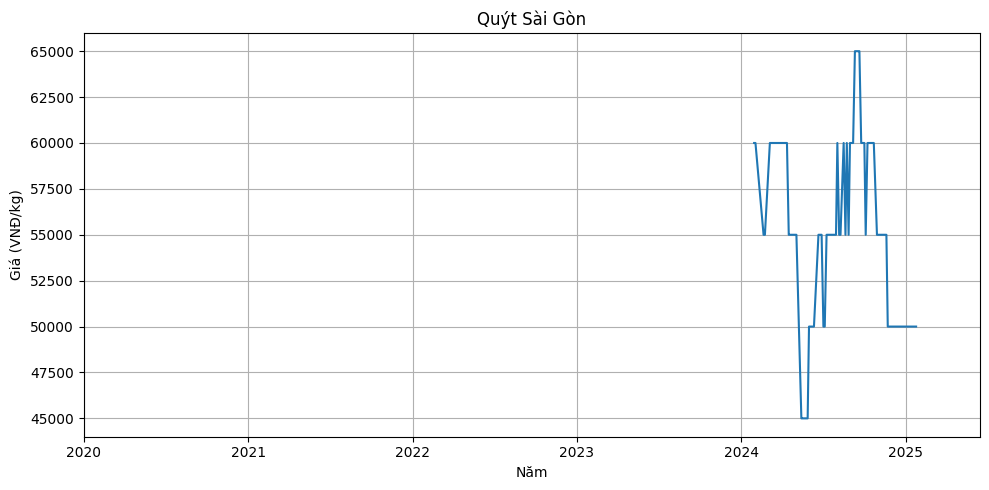

In [346]:
dataset.plot_one(names[7])

### 8 - Na

In [347]:
names[8]

'Na'

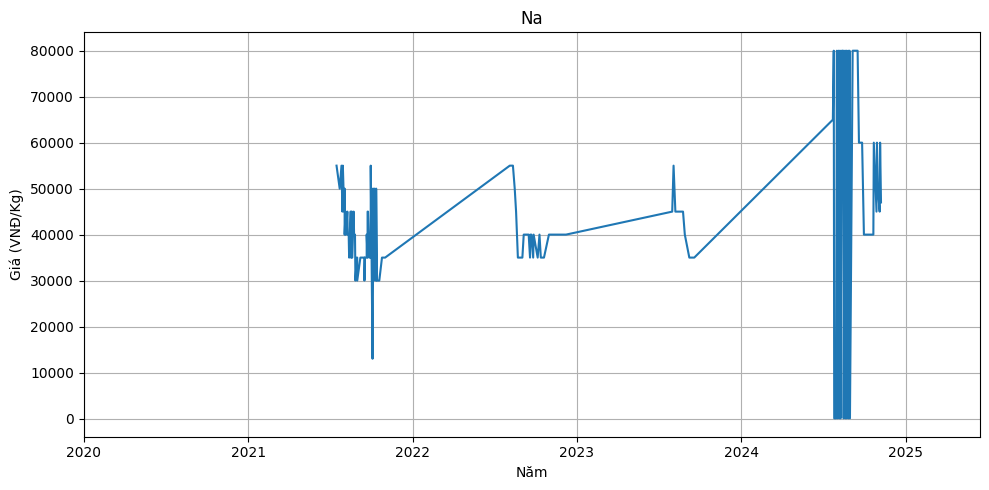

In [348]:
dataset.plot_one(names[8])

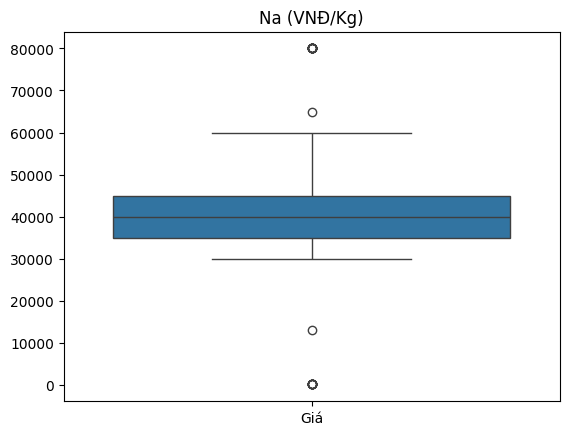

In [349]:
dataset.show_boxplot(names[8])

In [350]:
print(dataset.calc_outlier_perc(names[8], min_vals[8], max_vals[8]))
dataset.get_outlier_mathang_df(names[8], min_vals[8], max_vals[8])

0.16883116883116883


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
3883,Na,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2024-09-16,80000.0
3935,Na,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2024-09-12,80000.0
4017,Na,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2024-09-09,80000.0
4070,Na,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2024-09-05,80000.0
4123,Na,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-30,40.0
4154,Na,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2024-08-29,80000.0
4205,Na,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-27,35.0
4235,Na,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2024-08-26,80000.0
4259,Na,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-23,40.0
4290,Na,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2024-08-22,80000.0


In [351]:
_ = dataset.change_outlier_values_df(
    names[8],
    min_vals[8],
    max_vals[8],
    lambda x: x * 1000 if x < 1000 else x,
    inplace=True
)

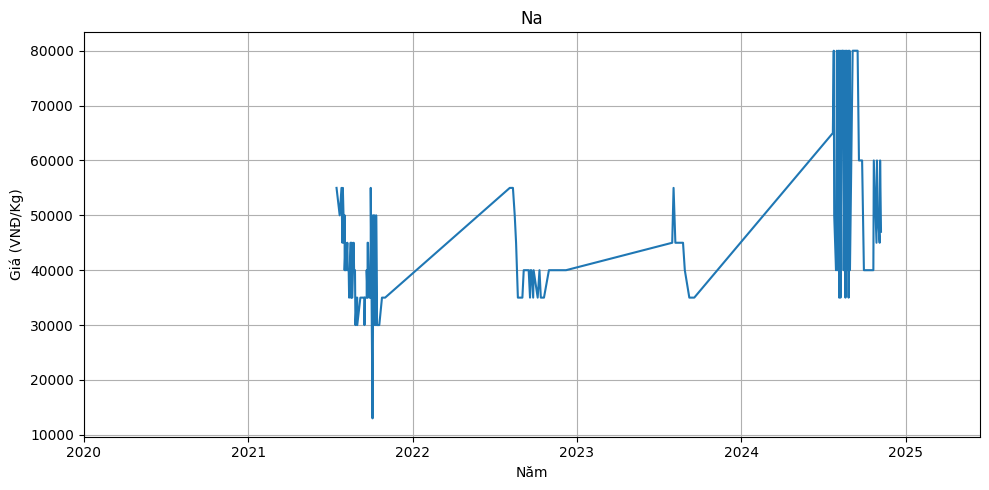

In [352]:
dataset.plot_one(names[8])

### 9 - Lê xanh

In [353]:
names[9]

'Lê xanh'

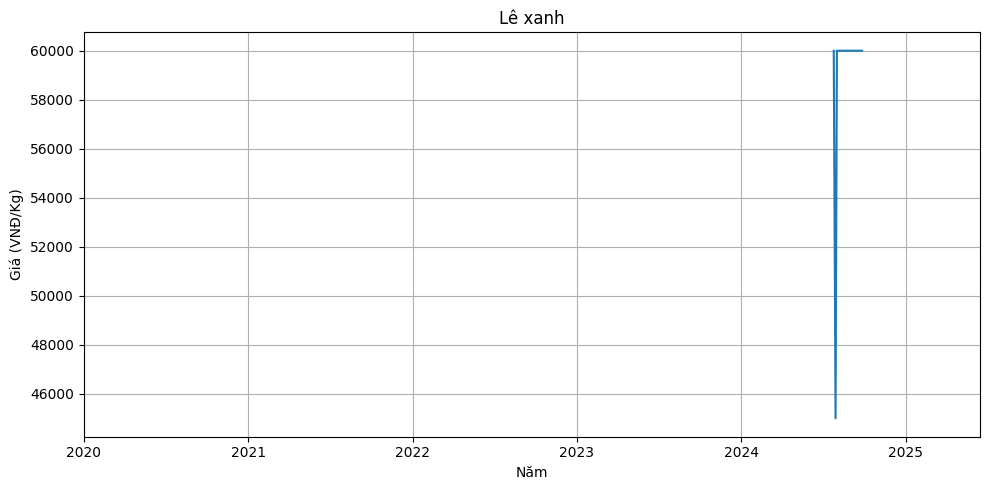

In [354]:
dataset.plot_one(names[9])

### 10 - Đào mỏ quạ

In [355]:
names[10]

'Đào mỏ quạ'

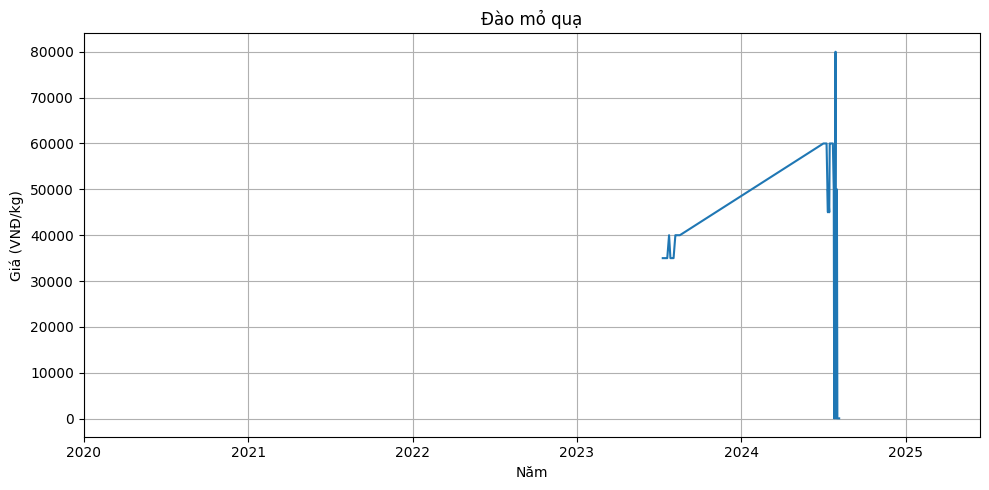

In [356]:
dataset.plot_one(names[10])

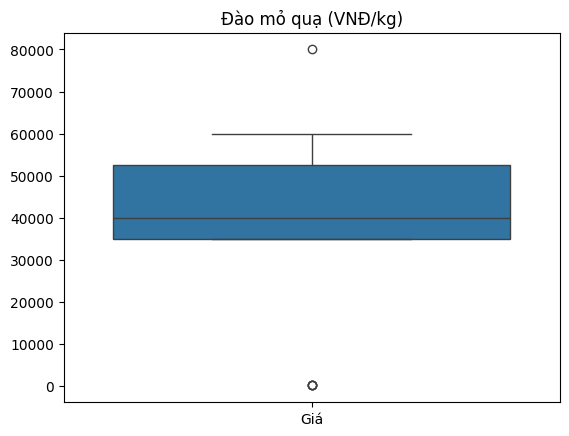

In [357]:
dataset.show_boxplot(names[10])

In [358]:
print(dataset.calc_outlier_perc(names[10], min_vals[10], max_vals[10]))
dataset.get_outlier_mathang_df(names[10], min_vals[10], max_vals[10])

0.17857142857142858


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
4579,Đào mỏ quạ,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-06,65.0
4632,Đào mỏ quạ,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-02,65.0
4717,Đào mỏ quạ,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-07-30,60.0
4745,Đào mỏ quạ,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2024-07-29,80000.0
4774,Đào mỏ quạ,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-07-26,60.0


In [359]:
_ = dataset.change_outlier_values_df(
    names[10],
    min_vals[10],
    max_vals[10],
    lambda x: x * 1000 if x < 1000 else x,
    inplace=True
)

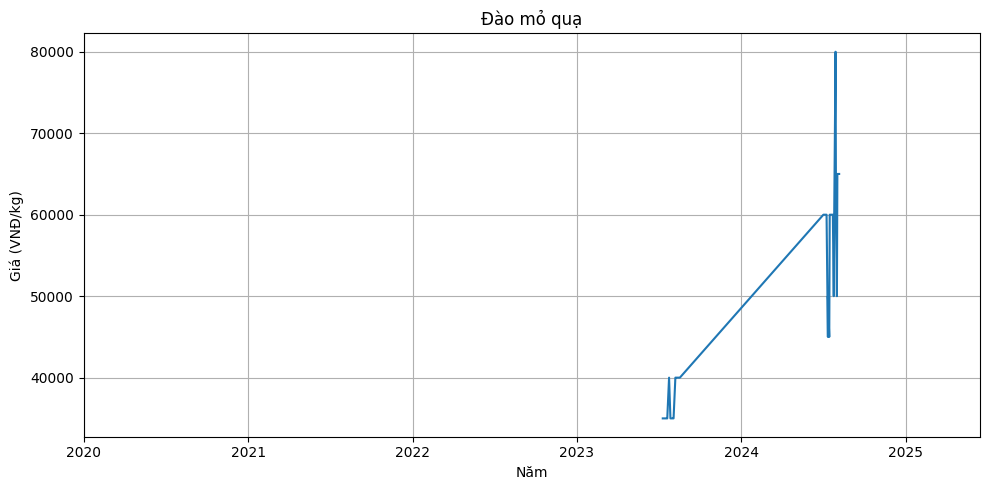

In [360]:
dataset.plot_one(names[10])

### 11 - Xoài Đài Loan

In [361]:
names[11]

'Xoài Đài Loan'

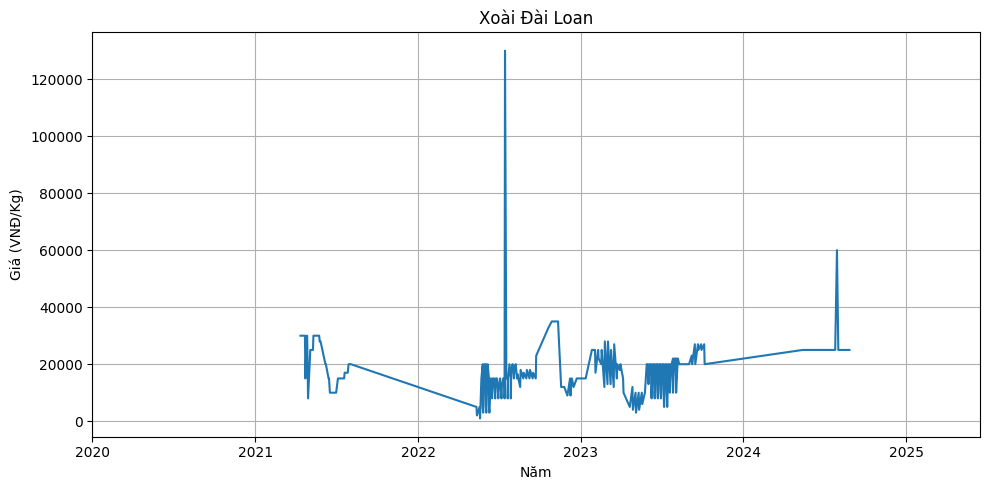

In [362]:
dataset.plot_one(names[11])

In [363]:
print(dataset.calc_outlier_perc(names[11], min_vals[11], max_vals[11]))
dataset.get_outlier_mathang_df(names[11], min_vals[11], max_vals[11])

0.008733624454148471


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
4767,Xoài Đài Loan,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2024-07-29,60000.0
20062,Xoài Đài Loan,Đồng Tháp,Vựa thu mua,VNĐ/Kg,VNĐ,CTV địa phương,2022-07-15,130000.0


In [364]:
rauqua_df[(rauqua_df["Tên_mặt_hàng"] == names[11]) & (rauqua_df["Giá"] < 20000)]

,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
10087,Xoài Đài Loan,Đồng Tháp,Thu mua tại vườn,VNĐ/Kg,VNĐ,CTV địa phương,2023-08-04,14000.0
10131,Xoài Đài Loan,An Giang,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,2023-08-03,10000.0
10261,Xoài Đài Loan,Đồng Tháp,Thu mua tại vườn,VNĐ/Kg,VNĐ,CTV địa phương,2023-07-28,15000.0
10305,Xoài Đài Loan,An Giang,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,2023-07-27,10000.0
10468,Xoài Đài Loan,Đồng Tháp,Thu mua tại vườn,VNĐ/Kg,VNĐ,CTV địa phương,2023-07-21,13000.0
...,...,...,...,...,...,...,...,...
28355,Xoài Đài Loan,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2021-06-17,10000.0
28422,Xoài Đài Loan,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2021-06-15,15000.0
28453,Xoài Đài Loan,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2021-06-14,15000.0
29205,Xoài Đài Loan,An Giang,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,2021-04-29,8000.0


In [365]:
_ = dataset.change_outlier_values_df(
    names[11],
    min_vals[11],
    max_vals[11],
    lambda x: x / 10 if x>=100000 else x,
    inplace=True
)

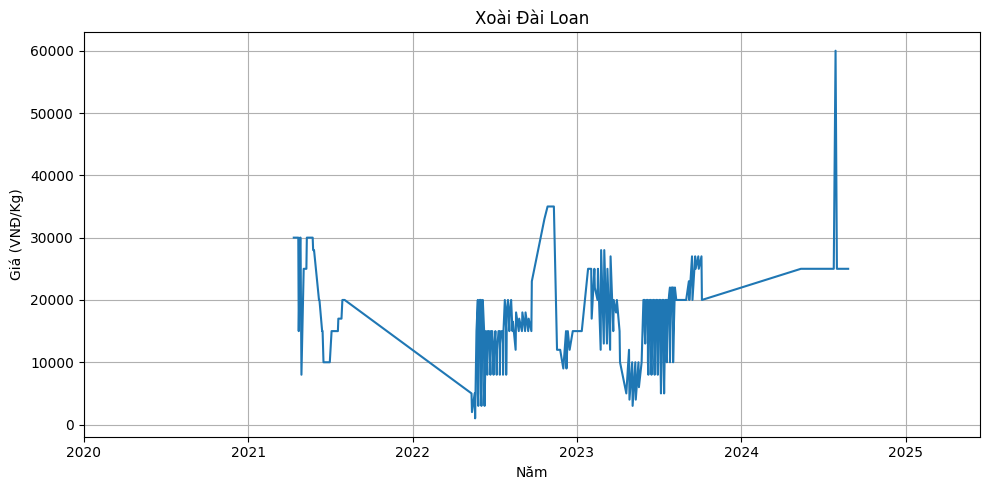

In [366]:
dataset.plot_one(names[11])

### 12 - Vải

In [367]:
names[12]

'Vải'

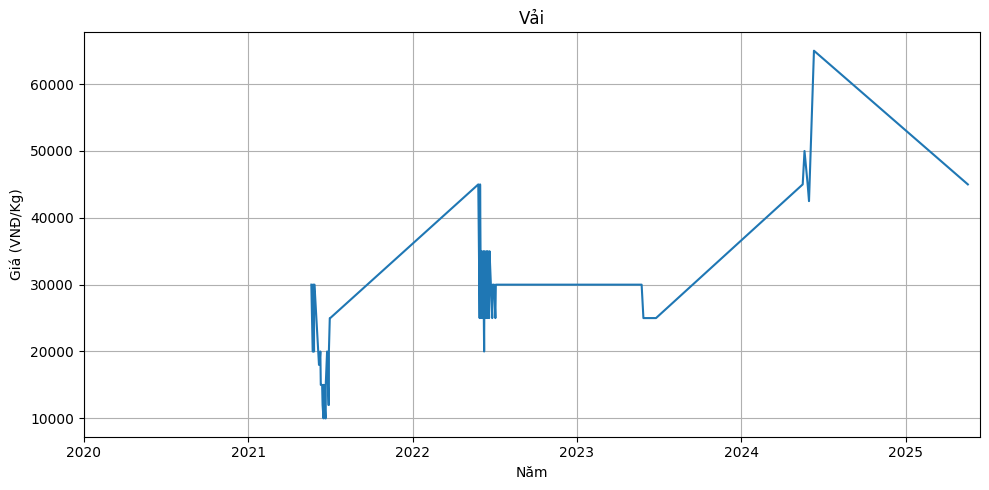

In [368]:
dataset.plot_one(names[12])

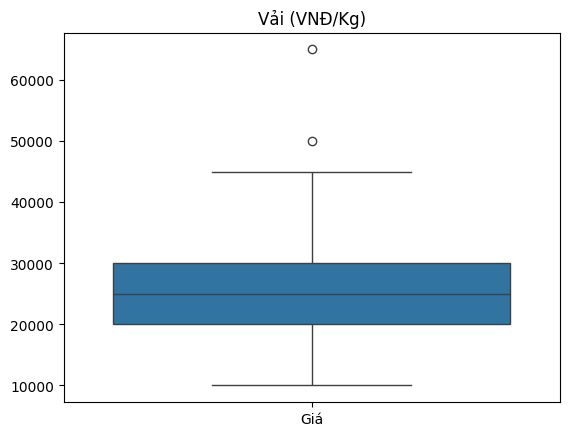

In [369]:
dataset.show_boxplot(names[12])

In [370]:
print(dataset.calc_outlier_perc(names[12], min_vals[12], max_vals[12]))
dataset.get_outlier_mathang_df(names[12], min_vals[12], max_vals[12])

0.03076923076923077


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
5462,Vải,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-06-11,65000.0
5768,Vải,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-05-21,50000.0


### 13 - Na Thái

In [371]:
names[13]

'Na Thái'

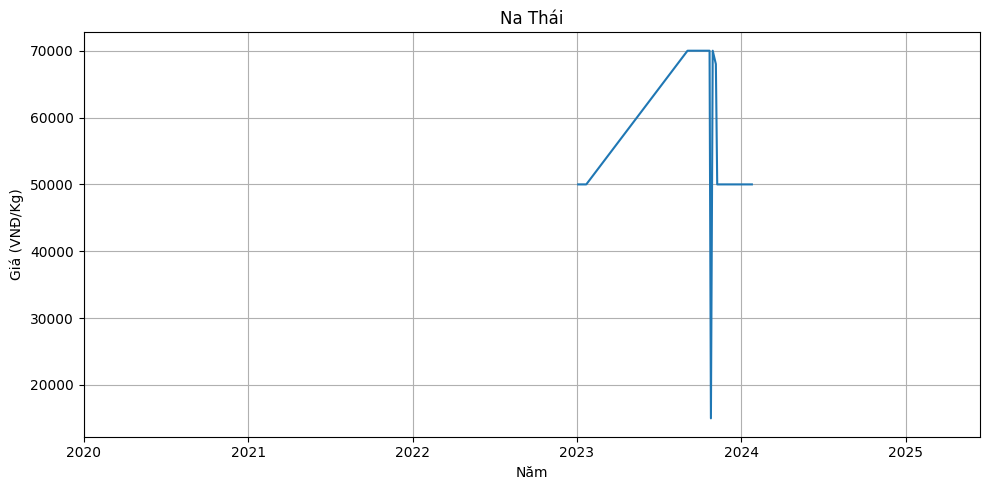

In [372]:
dataset.plot_one(names[13])

In [373]:
print(dataset.calc_outlier_perc(names[13], min_vals[13], max_vals[13]))
dataset.get_outlier_mathang_df(names[13], min_vals[13], max_vals[13])

0.027777777777777776


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
8376,Na Thái,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2023-10-26,15000.0


In [374]:
rauqua_df[rauqua_df["Tên_mặt_hàng"] == names[13]]

,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
7465,Na Thái,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2024-01-25,50000.0
7537,Na Thái,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2023-12-25,50000.0
7607,Na Thái,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2023-12-18,50000.0
7652,Na Thái,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2023-12-14,50000.0
7724,Na Thái,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2023-12-11,50000.0
7768,Na Thái,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2023-12-07,50000.0
7841,Na Thái,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2023-12-04,50000.0
7886,Na Thái,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2023-11-30,50000.0
7913,Na Thái,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2023-11-27,50000.0
7969,Na Thái,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2023-11-23,50000.0


In [375]:
print(rauqua_df[rauqua_df["Tên_mặt_hàng"] == names[13]]["Loại_giá"].unique())
print(rauqua_df[rauqua_df["Tên_mặt_hàng"] == names[13]]["Nguồn"].unique())

['Bán lẻ']
['CTV địa phương']


In [376]:
mean_13 = np.mean(rauqua_df[rauqua_df["Tên_mặt_hàng"] == names[13]]["Giá"])
_ = dataset.change_outlier_values_df(
    names[13],
    min_vals[13],
    max_vals[13],
    lambda x: mean_13,
    inplace=True
)

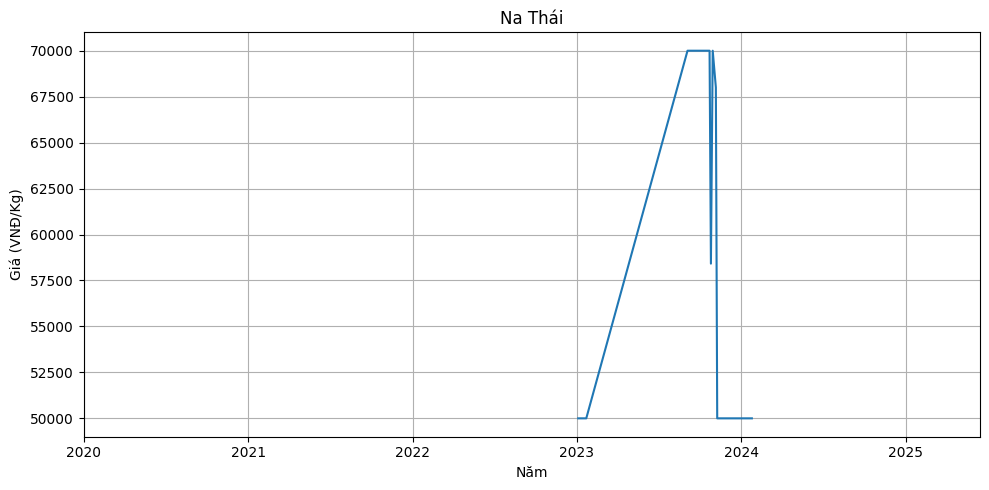

In [377]:
dataset.plot_one(names[13])

### 14 - Sầu riêng cơm vàng hạt lép

In [378]:
names[14]

'Sầu riêng cơm vàng hạt lép'

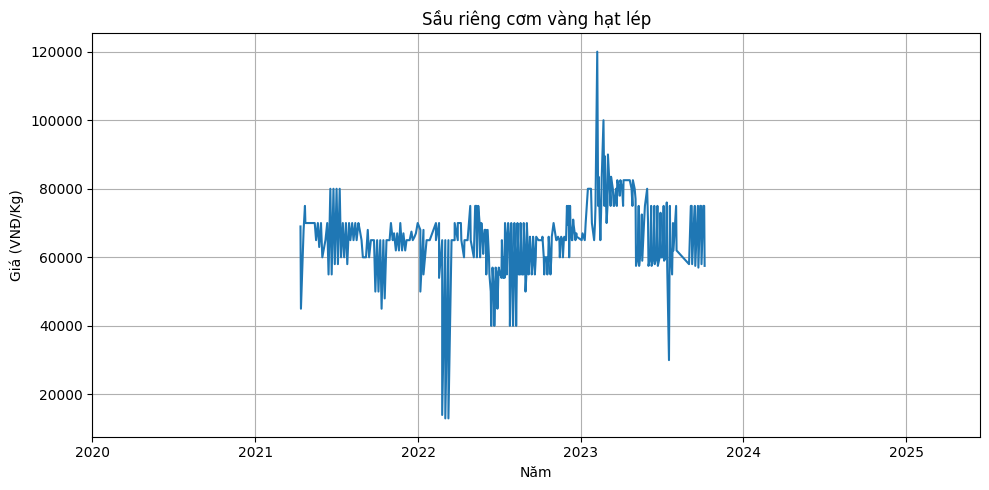

In [379]:
dataset.plot_one(names[14])

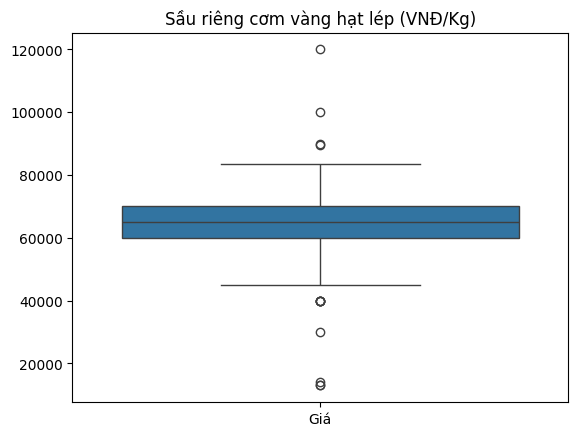

In [380]:
dataset.show_boxplot(names[14])